In [5]:
import midv500
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import cv2

In [3]:
dataset_dir = './midv500_data/'
export_dir = "midv500"
filename = 'midv500'

In [4]:
data = midv500.convert_to_coco(dataset_dir, export_dir, filename)

There are 14748 image files in folder ./midv500_data/.
Converting to coco.


100%|██████████| 14748/14748 [09:04<00:00, 27.07it/s]


In [13]:
image_file\
D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\CA\CA01_01.tif

'.\\midv500_data\\midv500\\01_alb_id\\images\\CA\\example_image.tif'

In [6]:
# Path to the dataset
dataset_path = '.\midv500_data\midv500'

# Example of accessing an image file
image_folder = os.path.join(dataset_path, '01_alb_id\images\CA')
image_file = os.path.join(image_folder, 'CA01_01.tif')

# Load the image using OpenCV
image = cv2.imread(image_file, cv2.IMREAD_COLOR)
# Optionally, convert BGR image to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display or process the image as needed


In [7]:
import json

# Example of accessing a ground truth (JSON) file
groundtruth_folder = os.path.join(dataset_path, '01_alb_id\ground_truth\CA')
json_file = os.path.join(groundtruth_folder, 'CA01_01.json')

# Load JSON data
with open(json_file, 'r') as f:
    annotation_data = json.load(f)

# Process annotation data as needed

In [17]:
annotation_data


{'quad': [[97, 672], [904, 643], [931, 1142], [122, 1185]]}

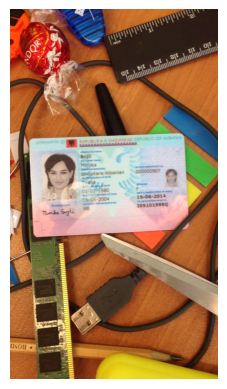

In [8]:
plt.imshow(image_rgb)
plt.axis('off')
plt.show()

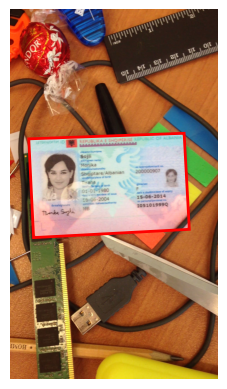

In [9]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Function to display image with annotations
def display_annotations(image, annotation_data):
    # Initialize plot
    fig, ax = plt.subplots(1)
    ax.imshow(image)

    # Extract quadrilateral coordinates
    quad_points = annotation_data['quad']

    # Draw the quadrilateral (bounding box)
    quad = patches.Polygon(quad_points, closed=True, linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(quad)

    plt.axis('off')
    plt.show()

# Assuming image_rgb and annotation_data are already loaded from previous steps
display_annotations(image_rgb, annotation_data)

In [10]:
# dataset_path = '.\midv500_data\midv500'

# # Function to count images in each document type folder
# def count_images_per_type(dataset_path):
#     document_types = {}
#     root_, dirs_, files_ = [x for x in os.walk(dataset_path)][0]

#     for context in dirs_:
#         path = root_ + "\\" + context + "\images"
#         root_, dirs_, files = [x for x in os.walk(path)][1]
#         if 'images' in files:  # Assuming images folder exists in each document type folder
#             document_type = root.split('\')[-2]  # Get document type from folder structure
#             num_images = len(files)
#             if document_type in document_types:
#                 document_types[document_type] += num_images
#             else:
#                 document_types[document_type] = num_images
    
#     return document_types

# # Example usage
# document_counts = count_images_per_type(dataset_path)
# print("Document Type Counts:")
# for doc_type, count in document_counts.items():
#     print(f"{doc_type}: {count} images")

In [11]:
# [x for x in os.walk(dataset_path)][0][0]

In [12]:
# root_, dirs_, files_ = [x for x in os.walk(dataset_path)][0]
# dirs_

In [15]:
import os

def count_images_per_type(dataset_path):
    document_types = {}

    # Traverse through each labeled folder (e.g., '01_alb_id', '02_bra_passport', ...)
    for label_folder in os.listdir(dataset_path):
        label_folder_path = os.path.join(dataset_path, label_folder)
        if not os.path.isdir(label_folder_path):
            continue
        
        # Traverse through each document type folder (e.g., 'images/CA', 'images/CS', ...)
        images_folder = os.path.join(label_folder_path, 'images')
        if not os.path.exists(images_folder):
            continue
        
        for doc_type_folder in os.listdir(images_folder):
            doc_type_folder_path = os.path.join(images_folder, doc_type_folder)
            if not os.path.isdir(doc_type_folder_path):
                continue
            
            # Count the number of images in this document type folder
            num_images = len([name for name in os.listdir(doc_type_folder_path) if os.path.isfile(os.path.join(doc_type_folder_path, name))])
            
            # Store the count in dictionary
            if label_folder not in document_types:
                document_types[label_folder] = {}
            
            document_types[label_folder][doc_type_folder] = num_images
    
    return document_types

# Example usage
dataset_path = '.\midv500_data\midv500'
document_counts = count_images_per_type(dataset_path)

# Print document type counts
image_count_dict = {}
total_count = 0
for label_folder, doc_counts in document_counts.items():
    image_count_dict[label_folder] = {}
    label_folder_count = 0
    # print(f"Label Folder: {label_folder}")
    for doc_type, count in doc_counts.items():
        image_count_dict[label_folder][doc_type] = count
        label_folder_count += count
        # print(f"  {doc_type}: {count} images")
    image_count_dict[label_folder]['total_count'] = label_folder_count
    total_count += label_folder_count
image_count_dict['total_count'] = total_count


In [19]:
image_count_dict_json_structure = json.dumps(image_count_dict, indent=4)
with open('.\image_count.json', 'w') as f:
        f.write(image_count_dict_json_structure)

In [20]:
import numpy as np

def image_resolution_stats(dataset_path):
    resolutions = []

    # Traverse through each labeled folder (e.g., '01_alb_id', '02_bra_passport', ...)
    for label_folder in os.listdir(dataset_path):
        label_folder_path = os.path.join(dataset_path, label_folder)
        if not os.path.isdir(label_folder_path):
            continue
        
        # Traverse through each document type folder (e.g., 'images/CA', 'images/CS', ...)
        images_folder = os.path.join(label_folder_path, 'images')
        if not os.path.exists(images_folder):
            continue
        
        for doc_type_folder in os.listdir(images_folder):
            doc_type_folder_path = os.path.join(images_folder, doc_type_folder)
            if not os.path.isdir(doc_type_folder_path):
                continue
            
            # Iterate through image files
            for image_file in os.listdir(doc_type_folder_path):
                image_path = os.path.join(doc_type_folder_path, image_file)
                if os.path.isfile(image_path):
                    image = plt.imread(image_path)
                    resolutions.append(image.shape[:2])  # Get image dimensions
    
    resolutions = np.array(resolutions)
    mean_resolution = np.mean(resolutions, axis=0)
    min_resolution = np.min(resolutions, axis=0)
    max_resolution = np.max(resolutions, axis=0)

    return mean_resolution, min_resolution, max_resolution

# Calculate image resolution statistics
mean_res, min_res, max_res = image_resolution_stats(dataset_path)

# Print summary statistics
print(f"Image Resolution Statistics:")
print(f"  Mean Image Resolution: {mean_res}")
print(f"  Minimum Image Resolution: {min_res}")
print(f"  Maximum Image Resolution: {max_res}")

Image Resolution Statistics:
  Mean Image Resolution: [1920. 1080.]
  Minimum Image Resolution: [1920 1080]
  Maximum Image Resolution: [1920 1080]


In [21]:
# import os
# import matplotlib.pyplot as plt

# def count_images_per_type(dataset_path):
#     document_types = {}

#     # Traverse through each labeled folder (e.g., '01_alb_id', '02_bra_passport', ...)
#     for label_folder in os.listdir(dataset_path):
#         label_folder_path = os.path.join(dataset_path, label_folder)
#         if not os.path.isdir(label_folder_path):
#             continue
        
#         # Traverse through each document type folder (e.g., 'images/CA', 'images/CS', ...)
#         images_folder = os.path.join(label_folder_path, 'images')
#         if not os.path.exists(images_folder):
#             continue
        
#         for doc_type_folder in os.listdir(images_folder):
#             doc_type_folder_path = os.path.join(images_folder, doc_type_folder)
#             if not os.path.isdir(doc_type_folder_path):
#                 continue
            
#             # Count the number of images in this document type folder
#             num_images = len([name for name in os.listdir(doc_type_folder_path) if os.path.isfile(os.path.join(doc_type_folder_path, name))])
            
#             # Store the count in dictionary
#             if label_folder not in document_types:
#                 document_types[label_folder] = {}
            
#             document_types[label_folder][doc_type_folder] = num_images
    
#     return document_types

# # Path to the dataset
# dataset_path = 'midv500_data/midv500'

# # Count images per document type
# document_counts = count_images_per_type(dataset_path)

# # Print document type counts
# print("Document Type Counts:")
# for label_folder, doc_counts in document_counts.items():
#     print(f"Label Folder: {label_folder}")
#     for doc_type, count in doc_counts.items():
#         print(f"  {doc_type}: {count} images")

# # Plotting document type distribution
# plt.figure(figsize=(12, 6))
# for i, (label_folder, doc_counts) in enumerate(document_counts.items(), 1):
#     plt.subplot(1, len(document_counts), i)
#     plt.bar(doc_counts.keys(), doc_counts.values())
#     plt.xlabel('Document Types')
#     plt.ylabel('Number of Images')
#     plt.title(f'Distribution of Document Types in {label_folder}')
#     plt.xticks(rotation=45)
# plt.tight_layout()
# plt.show()

In [71]:
# Example code using TensorFlow and Keras API for Faster R-CNN

from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import Sequence
import numpy as np
import json
import os

# Define paths and parameters
dataset_path = 'path_to_midv500_dataset'
annotations_path = 'path_to_annotations_folder'
image_size = (256, 256)  # Resize images to this size
batch_size = 8
epochs = 20

# Load annotations
with open(annotations_path, 'r') as f:
    annotations = json.load(f)

# Define a custom data generator
class DataGenerator(Sequence):
    def __init__(self, annotations, batch_size=32, image_size=(256, 256)):
        self.annotations = annotations
        self.batch_size = batch_size
        self.image_size = image_size
        self.image_paths = [os.path.join(dataset_path, image['filename']) for image in annotations['images']]
        self.num_samples = len(self.image_paths)

    def __len__(self):
        return int(np.ceil(self.num_samples / float(self.batch_size)))

    def __getitem__(self, index):
        batch_image_paths = self.image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = np.zeros((self.batch_size,) + self.image_size + (3,), dtype='float32')
        batch_annotations = []

        for i, image_path in enumerate(batch_image_paths):
            image = load_img(image_path, target_size=self.image_size)
            image = img_to_array(image)
            image = preprocess_input(image)
            batch_images[i] = image

            # Retrieve annotations for this image
            image_id = os.path.basename(image_path).split('.')[0]
            for annotation in annotations['annotations']:
                if annotation['image_id'] == image_id:
                    bbox = annotation['bbox']
                    batch_annotations.append({
                        'image_id': image_id,
                        'bbox': bbox
                    })
                    break

        return batch_images, batch_annotations

# Create train and validation generators
train_generator = DataGenerator(annotations['train'], batch_size=batch_size, image_size=image_size)
valid_generator = DataGenerator(annotations['valid'], batch_size=batch_size, image_size=image_size)

# Define model architecture
backbone = ResNet50(weights='imagenet', include_top=False, input_shape=(*image_size, 3))
model = models.Sequential([
    backbone,
    layers.GlobalAveragePooling2D(),
    layers.Dense(256, activation='relu'),
    layers.Dense(4, activation='linear')  # Assuming 4 coordinates for bounding box
])

# Compile the model
model.compile(optimizer=Adam(lr=1e-4), loss='mse')

# Train the model
model.fit(train_generator, epochs=epochs, validation_data=valid_generator)

# Save the trained model
model.save('./path_to_save_model')

: 

In [1]:
# Define paths and parameters
dataset_path = 'path_to_midv500_dataset'
annotations_path = 'path_to_annotations_folder'
image_size = (256, 256)  # Resize images to this size
batch_size = 8
epochs = 20

# Load annotations
with open(annotations_path, 'r') as f:
    annotations = json.load(f)

# Define a custom data generator
class DataGenerator(Sequence):
    def __init__(self, annotations, batch_size=32, image_size=(256, 256)):
        self.annotations = annotations
        self.batch_size = batch_size
        self.image_size = image_size
        self.image_paths = [os.path.join(dataset_path, image['filename']) for image in annotations['images']]
        self.num_samples = len(self.image_paths)

    def __len__(self):
        return int(np.ceil(self.num_samples / float(self.batch_size)))

    def __getitem__(self, index):
        batch_image_paths = self.image_paths[index * self.batch_size:(index + 1) * self.batch_size]
        batch_images = np.zeros((self.batch_size,) + self.image_size + (3,), dtype='float32')
        batch_annotations = []

        for i, image_path in enumerate(batch_image_paths):
            image = load_img(image_path, target_size=self.image_size)
            image = img_to_array(image)
            image = preprocess_input(image)
            batch_images[i] = image

            # Retrieve annotations for this image
            image_id = os.path.basename(image_path).split('.')[0]
            for annotation in annotations['annotations']:
                if annotation['image_id'] == image_id:
                    bbox = annotation['bbox']
                    batch_annotations.append({
                        'image_id': image_id,
                        'bbox': bbox
                    })
                    break

        return batch_images, batch_annotations

FileNotFoundError: [Errno 2] No such file or directory: 'path_to_annotations_folder'

In [ ]:
# Install necessary packages
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.layers import Input, Lambda, Conv2D, BatchNormalization, LeakyReLU, ZeroPadding2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.losses import binary_crossentropy
import numpy as np

# Define YOLOv3 architecture
def yolo_v3(input_shape=(416, 416, 3), num_classes=1):
    input_layer = Input(shape=input_shape)

    # Define model layers (simplified version, adjust as needed)
    # Example architecture here: https://github.com/AlexeyAB/darknet/blob/master/cfg/yolov3.cfg
    # Define layers...

    model = Model(inputs=input_layer, outputs=output_layers)
    return model

# Compile the model
model = yolo_v3(input_shape=(416, 416, 3), num_classes=num_classes)
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Load and preprocess dataset (replace with your dataset loading and preprocessing steps)

# Train the model
model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(x_val, y_val))

# Save the trained model
model.save('yolov3_model.h5')

In [51]:
import os
import json

def convert_annotation(json_file, txt_file, image_width, image_height):
    with open(json_file, 'r') as f:
        data = json.load(f)
        # print((data))
    
    with open(txt_file, 'w') as f:
        # print(data['quad'])
        # for annotation in data['quad']:
        annotation = data['quad']
        # Extract bounding box coordinates (x1, y1, x2, y2, x3, y3, x4, y4)
        x1, y1 = annotation[0]
        x2, y2 = annotation[1]
        x3, y3 = annotation[2]
        x4, y4 = annotation[3]
            
        # Calculate bounding box center and size
        x_center = (x1 + x2 + x3 + x4) / 4.0 / image_width
        y_center = (y1 + y2 + y3 + y4) / 4.0 / image_height
        width = (max(x1, x2, x3, x4) - min(x1, x2, x3, x4)) / image_width
        height = (max(y1, y2, y3, y4) - min(y1, y2, y3, y4)) / image_height

        # Write to file in YOLO format
        class_id = 0  # Assuming single class, update if you have multiple classes
        f.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

def process_dataset(dataset_path):
    for label_folder in os.listdir(dataset_path):
        label_folder_path = os.path.join(dataset_path, label_folder)
        if not os.path.isdir(label_folder_path):
            continue
        
        images_folder = os.path.join(label_folder_path, 'images')
        groundtruth_folder = os.path.join(label_folder_path, 'ground_truth')
        if not os.path.exists(images_folder) or not os.path.exists(groundtruth_folder):
            continue
        
        for doc_type_folder in os.listdir(images_folder):
            doc_type_folder_path = os.path.join(images_folder, doc_type_folder)
            gt_doc_type_folder_path = os.path.join(groundtruth_folder, doc_type_folder)
            if not os.path.isdir(doc_type_folder_path) or not os.path.isdir(gt_doc_type_folder_path):
                continue
            
            for image_file in os.listdir(doc_type_folder_path):
                if not image_file.endswith('.tif'):
                    continue
                
                image_path = os.path.join(doc_type_folder_path, image_file)
                json_file = os.path.join(gt_doc_type_folder_path, image_file.replace('.tif', '.json'))
                txt_file = os.path.join(gt_doc_type_folder_path, image_file.replace('.tif', '.txt'))
                txt_file = txt_file.replace('ground_truth', 'images')
                
                # Load image to get dimensions
                image = plt.imread(image_path)
                image_height, image_width = image.shape[:2]
                # print(json_file)
                # print(text_file)
                # Convert annotation
                convert_annotation(json_file, txt_file, image_width, image_height)

dataset_path = '.\midv500_data\midv500'
process_dataset(dataset_path)

In [88]:
import os
import random

def create_dataset_files(dataset_path, output_path, split_ratio=0.8):
    images_list = []
    
    for label_folder in os.listdir(dataset_path):
        label_folder_path = os.path.join(dataset_path, label_folder)
        if not os.path.isdir(label_folder_path):
            continue
        
        images_folder = os.path.join(label_folder_path, 'images')
        groundtruth_folder = os.path.join(label_folder_path, 'ground_truth')
        if not os.path.exists(images_folder) or not os.path.exists(groundtruth_folder):
            continue
        
        for doc_type_folder in os.listdir(images_folder):
            doc_type_folder_path = os.path.join(images_folder, doc_type_folder)
            gt_doc_type_folder_path = os.path.join(groundtruth_folder, doc_type_folder)
            if not os.path.isdir(doc_type_folder_path) or not os.path.isdir(gt_doc_type_folder_path):
                continue
            
            for image_file in os.listdir(doc_type_folder_path):
                if not image_file.endswith('.tif'):
                    continue
                
                image_path = os.path.join(doc_type_folder_path, image_file)
                txt_file = os.path.join(gt_doc_type_folder_path, image_file.replace('.tif', '.txt'))
                
                if os.path.exists(txt_file):
                    images_list.append(image_path)
    
    random.shuffle(images_list)
    split_index = int(len(images_list) * split_ratio)
    train_images = images_list[:split_index]
    val_images = images_list[split_index:]
    
    with open(os.path.join(output_path, 'train.txt'), 'w') as f:
        for image_path in train_images:
            f.write(image_path + '\n')
    
    with open(os.path.join(output_path, 'val.txt'), 'w') as f:
        for image_path in val_images:
            f.write(image_path + '\n')

output_path = '.\\'
create_dataset_files(dataset_path, output_path)

In [53]:
import os

def check_dataset(train_file, val_file):
    def check_file_list(file_list):
        with open(file_list, 'r') as f:
            lines = f.readlines()
        missing_labels = []
        for line in lines:
            image_path = line.strip()
            label_path = image_path.replace('/images/', '/ground_truth/').replace('.tif', '.txt')
            if not os.path.exists(label_path):
                missing_labels.append(label_path)
        return missing_labels

    train_missing = check_file_list(train_file)
    val_missing = check_file_list(val_file)

    if train_missing:
        print("Missing labels in training set:")
        for missing in train_missing:
            print(missing)
    else:
        print("All training labels are present.")
    
    if val_missing:
        print("Missing labels in validation set:")
        for missing in val_missing:
            print(missing)
    else:
        print("All validation labels are present.")

# Update these paths to the locations of your train.txt and val.txt
train_file = 'D:/playground/mdfv500/train.txt'
val_file = 'D:/playground/mdfv500/val.txt'

check_dataset(train_file, val_file)

All training labels are present.
All validation labels are present.


In [87]:
import os
import shutil

# Define paths
current_dir = './'  # Update with your current directory path
data_dir = os.path.join(current_dir, 'data')
images_dir = os.path.join(data_dir, 'images')
labels_dir = os.path.join(data_dir, 'labels')
midv500_dir = 'D:\playground\mdfv500\midv500_data\midv500'  # Update with your actual path to midv500

# Ensure data directory exists, create images and labels directories
os.makedirs(images_dir, exist_ok=True)
os.makedirs(labels_dir, exist_ok=True)

# Function to copy files from source to destination
def copy_files(source_dir, dest_dir):
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            src_file = os.path.join(root, file)
            dest_file = dest_dir + '\\' + file #os.path.join(dest_dir, os.path.relpath(src_file, source_dir))
            os.makedirs(os.path.dirname(dest_file), exist_ok=True)
            shutil.copyfile(src_file, dest_file)
            print(f'Copied {src_file} to {dest_file}')

# # Copy images from midv500/images to data/images
# copy_files(os.path.join(midv500_dir, '01_alb_id/images'), images_dir)
# copy_files(os.path.join(midv500_dir, '02_bra_passport/images'), images_dir)
# # Add more lines for other folders as needed

# # Copy labels from midv500/ground_truth to data/labels
# copy_files(os.path.join(midv500_dir, '01_alb_id/labels'), labels_dir)
# copy_files(os.path.join(midv500_dir, '02_bra_passport/labels'), labels_dir)
# Add more lines for other folders as needed


for dir in [x for x in os.walk(midv500_dir)][0][1]:
    join_dir_images = dir + '\\images'
    join_dir_labels = dir + '\\labels'
    copy_files(os.path.join(midv500_dir, join_dir_images), images_dir)
    copy_files(os.path.join(midv500_dir, join_dir_labels), labels_dir)

Copied D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\01_alb_id.tif to ./data\images\01_alb_id.tif
Copied D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\CA\CA01_01.tif to ./data\images\CA01_01.tif
Copied D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\CA\CA01_01.txt to ./data\images\CA01_01.txt
Copied D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\CA\CA01_02.tif to ./data\images\CA01_02.tif
Copied D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\CA\CA01_02.txt to ./data\images\CA01_02.txt
Copied D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\CA\CA01_03.tif to ./data\images\CA01_03.tif
Copied D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\CA\CA01_03.txt to ./data\images\CA01_03.txt
Copied D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\CA\CA01_04.tif to ./data\images\CA01_04.tif
Copied D:\playground\mdfv500\midv500_data\midv500\01_alb_id\images\CA\CA01_04.txt to ./data\images\CA01_04.txt


In [ ]:
root_dir = 'D:/playground/mdfv500/midv500_data/midv500'
dir = [x for x in os.walk(root_dir)][1][1]
for d in  dir:
    d_dir = root_dir + dir + '/'
    img_dir = [x for x in os.walk(root_dir)][1][1]

In [86]:
root_dir = 'D:/playground/mdfv500/midv500_data/midv500'
[x for x in os.walk(midv500_dir)][0][1]

['01_alb_id',
 '02_aut_drvlic_new',
 '03_aut_id_old',
 '04_aut_id',
 '05_aze_passport',
 '06_bra_passport',
 '07_chl_id',
 '08_chn_homereturn',
 '09_chn_id',
 '10_cze_id',
 '11_cze_passport',
 '12_deu_drvlic_new',
 '13_deu_drvlic_old',
 '14_deu_id_new',
 '15_deu_id_old',
 '16_deu_passport_new',
 '17_deu_passport_old',
 '18_dza_passport',
 '19_esp_drvlic',
 '20_esp_id_new',
 '21_esp_id_old',
 '22_est_id',
 '23_fin_drvlic',
 '24_fin_id',
 '25_grc_passport',
 '26_hrv_drvlic',
 '27_hrv_passport',
 '28_hun_passport',
 '29_irn_drvlic',
 '30_ita_drvlic',
 '31_jpn_drvlic',
 '32_lva_passport',
 '33_mac_id',
 '34_mda_passport',
 '35_nor_drvlic',
 '36_pol_drvlic',
 '37_prt_id',
 '38_rou_drvlic',
 '39_rus_internalpassport',
 '40_srb_id',
 '41_srb_passport',
 '42_svk_id',
 '43_tur_id',
 '44_ukr_id',
 '45_ukr_passport',
 '46_ury_passport',
 '47_usa_bordercrossing',
 '48_usa_passportcard',
 '49_usa_ssn82',
 '50_xpo_id']

In [69]:
import os
import shutil

# Define paths
current_dir = './'  # Update with your current directory path
data_dir = os.path.join(current_dir, 'data')
images_dir = os.path.join(data_dir, 'images')
midv500_dir = 'D:\playground\mdfv500\midv500_data\midv500'  # Update with your actual path to midv500

# Ensure data directory exists, create images directory
os.makedirs(images_dir, exist_ok=True)

# Function to copy TIFF images from source to destination
def copy_images(source_dir, dest_dir):
    for root, dirs, files in os.walk(source_dir):
        for file in files:
            if file.endswith('.tiff'):
                src_file = os.path.join(root, file)
                dest_file = os.path.join(dest_dir, file)
                shutil.copyfile(src_file, dest_file)
                print(f'Copied {src_file} to {dest_file}')

# Copy TIFF images from midv500/images to data/images
copy_images(os.path.join(midv500_dir, '01_alb_id/images'), images_dir)
copy_images(os.path.join(midv500_dir, '02_bra_passport/images'), images_dir)
# Add more lines for other folders as needed


In [ ]:
train_path = ".\data"
midv500_dir = 'D:\playground\mdfv500\midv500_data\midv500'

In [89]:
import os
import shutil
import random

def create_dataset_files(dataset_path, output_path, split_ratio=0.8):
    """
    Create train.txt and val.txt files for a dataset located at dataset_path,
    with images in 'images' subfolder and labels in 'labels' subfolder,
    and save these lists to output_path.
    
    Parameters:
    - dataset_path (str): Path to the dataset directory.
    - output_path (str): Path to save the train.txt and val.txt files.
    - split_ratio (float): Ratio of training images to total images (default is 0.8).
    """
    images_dir = os.path.join(dataset_path, 'images')
    labels_dir = os.path.join(dataset_path, 'labels')
    
    # List all image files
    image_files = [f for f in os.listdir(images_dir) if f.endswith('.tif')]
    num_images = len(image_files)
    num_train = int(num_images * split_ratio)
    
    # Randomize the order of images
    random.shuffle(image_files)
    
    # Split into training and validation sets
    train_files = image_files[:num_train]
    val_files = image_files[num_train:]
    
    # Write paths to train.txt and val.txt
    with open(os.path.join(output_path, 'train.txt'), 'w') as f:
        for file in train_files:
            image_path = os.path.join(images_dir, file)
            label_file = os.path.splitext(file)[0] + '.txt'
            label_path = os.path.join(labels_dir, label_file)
            f.write(f"{image_path}\n")
            # Optionally check if label file exists
            if not os.path.exists(label_path):
                print(f"Warning: Label file '{label_path}' not found for '{image_path}'")
    
    with open(os.path.join(output_path, 'val.txt'), 'w') as f:
        for file in val_files:
            image_path = os.path.join(images_dir, file)
            label_file = os.path.splitext(file)[0] + '.txt'
            label_path = os.path.join(labels_dir, label_file)
            f.write(f"{image_path}\n")
            # Optionally check if label file exists
            if not os.path.exists(label_path):
                print(f"Warning: Label file '{label_path}' not found for '{image_path}'")

# Example usage:
dataset_path = '.\\data'
output_path = '.\\'  # Update with your desired output path
create_dataset_files(dataset_path, output_path)


In [5]:
import torch
print(torch.cuda.is_available())

False


In [4]:
print(torch.cuda.device_count())

0


In [ ]:
pip install torch torchvision torchaudio -f https://download.pytorch.org/whl/cu125/torch_stable.html